<a href="https://colab.research.google.com/github/trilgar/SystemAnalysis/blob/main/SA_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# Задача 1 (Варіант 11)

## Визначення умов задачі:

1. Визначення даних:   
При заданих цільових функціях $f1(x)$, $f2(x)$ і порогових обмеженнях $f1*$, $f2*$ визначити область Парето на заданому інтервалі [x1, x2] при виконанні умов $f1(x)>=f1*$ , $f2(x)>=f2*$  Звузити область Парето, використовуючи прийоми технічних обмежень.
При вирішенні рівнянь все обчислення провести з точністю до 0.0001, при звуженні інтервалів значення кордонів округлити до 0.001 і крок сітки брати рівним 0.001.  
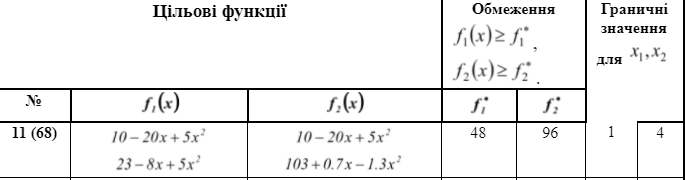


In [ ]:
f1 = lambda x: 23 - 8*x +5*x**2
f2 = lambda x: 103 + 0.7*x + 1.3*x**2
f1_lim = 48
f2_lim = 96
x1 = 1
x2 = 4

In [ ]:
x = np.arange(1, 4.0001, 0.001)
F1 = np.array([f1(c) for c in x])
F2 = np.array([f2(c) for c in x])
y1 = np.array([f1(c)/f1_lim for c in x])
y2 = np.array([f2(c)/f2_lim for c in x])
table = pd.DataFrame({"f1/f1*" : y1,"f2/f2*": y2}, index=x)
table = np.round(table, decimals=4)
table

,f1/f1*,f2/f2*
1.000,0.4167,1.0938
1.001,0.4167,1.0938
1.002,0.4168,1.0938
1.003,0.4168,1.0939
1.004,0.4168,1.0939
...,...,...
3.996,1.4765,1.3183
3.997,1.4772,1.3184
3.998,1.4778,1.3185
3.999,1.4785,1.3186


## Знаходження області Парето та побудова графіків: 


1. Розв'язання нерівностей:  
Для того, щоб визначити область Парето розв'яжемо нерівності $f1(x)>=f1* , f2(x) >=f2*$ :  
1) $23 - 8x +5x^2 >= 48$  
2) $103 +0.7x -1.3x^2>=96$  
Для першої нерівності рішення $ x є (-\infty ; \frac{(4 -\sqrt{141})}{5}] U [\frac{(4 +\sqrt{141})}{5} ; +\infty) $  
Друга нерівність виконується $\forall x є R$  
Отже, враховуючи граничні значення потенційна область Парето має вигляд $[\frac{(4 +\sqrt{141})}{5};4]$ 

2. Намалюємо графік: 

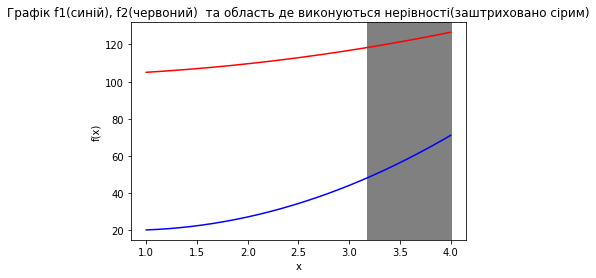

In [ ]:
plt.title("Графік f1(синій), f2(червоний)  та область де виконуються нерівності(заштриховано сірим)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, F1, color = "blue")
plt.plot(x, F2, color = "red")
left_limit = np.round((4+math.sqrt(141))/5, decimals= 3)
right_limit = 4
plt.axvspan(left_limit, right_limit, color = "gray")
plt.show()

Уже зараз очевидно, що область Парето звузити не вдасться, оскільки графіки монотонно зростаюсь на в всій області визначення, тобто по факту область парето взагалі не визначена на цьому проміжку. Але для демонстрації методу технічних обмежень ми все одно продовжимо намагатися звузити область (чого в нас очевидно не вийде).

## Звуження за допомогою методу технічних обмежень:


1. Формуємо таблицю:

In [ ]:
table["max(fi/fi*)"] = np.maximum(y1,y2)
table["min(fi/fi*)"] = np.minimum(y1,y2)
table = np.round(table, decimals=4)
table

,f1/f1*,f2/f2*,max(fi/fi*),min(fi/fi*)
1.000,0.4167,1.0938,1.0938,0.4167
1.001,0.4167,1.0938,1.0938,0.4167
1.002,0.4168,1.0938,1.0938,0.4168
1.003,0.4168,1.0939,1.0939,0.4168
1.004,0.4168,1.0939,1.0939,0.4168
...,...,...,...,...
3.996,1.4765,1.3183,1.4765,1.3183
3.997,1.4772,1.3184,1.4772,1.3184
3.998,1.4778,1.3185,1.4778,1.3185
3.999,1.4785,1.3186,1.4785,1.3186


2. Обчислюємо **minmax = min(min(fi/fi*))** та **maxmin = max(min(fi/fi*))**: 

In [ ]:
minmax = min(table["max(fi/fi*)"])
maxmin = max(table["min(fi/fi*)"])
print("minmax = ", minmax)
print("maxmin = ", maxmin)

minmax =  1.0938
maxmin =  1.3187


3. Висновок:  
Бачимо ,що за допомогою методу технічних обмежень звузити область не вдалося 
(Область Парето за методом технічних обмежень має лежати між $minmax(\frac{fi}{fi*})$ та $maxmin(\frac{fi}{fi*})$ . Тобто, $xє[1, 4]$)

# Задача 2 (Варіант 11)

## Визначення умов задачі

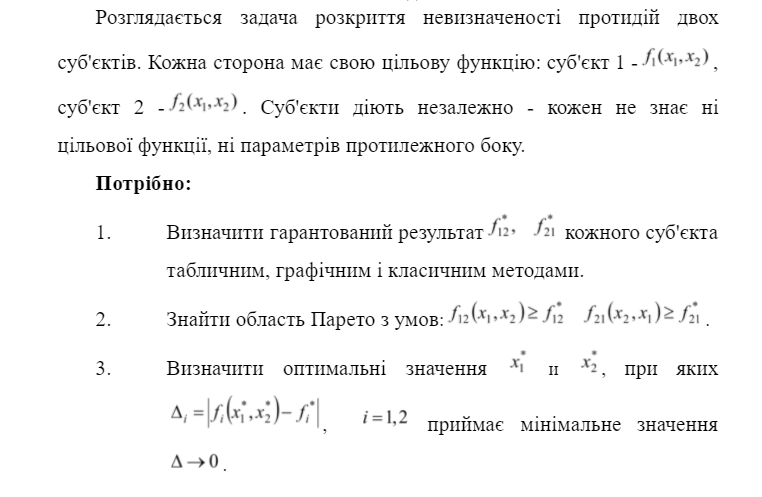

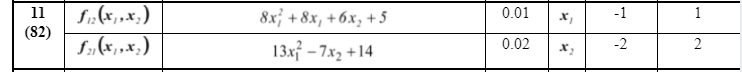

## Знаходження гарантованого результату

In [ ]:
f1 = lambda x1,x2 : 8* x1**2 + 8*x1 + 6*x2 + 5 
f2 = lambda x1,x2 : 13* x1**2 - 7* x2 + 14
x1_min = -1
x1_max = 1
x2_min = -2
x2_max = 2
step1 = 0.01
step2 = 0.02 

### Табличний метод

In [ ]:
x1 = np.arange(x1_min, x1_max + 0.00001, step1)
x2 = np.arange(x2_min, x2_max + 0.00001, step2)
x = []
for x_1 in x1:
  for x_2 in x2: 
    x.append([x_1, x_2])
x = np.array(x)
F1 = np.array([f1(x,y) for x,y in x])
F2 = np.array([f2(x,y) for x,y in x])
table = pd.DataFrame({"x1": x.T[0], "x2":x.T[1], "f1(x1,x2)": F1, "f2(x1,x2)": F2})
table

,x1,x2,"f1(x1,x2)","f2(x1,x2)"
0,-1.0,-2.00,-7.00,41.00
1,-1.0,-1.98,-6.88,40.86
2,-1.0,-1.96,-6.76,40.72
3,-1.0,-1.94,-6.64,40.58
4,-1.0,-1.92,-6.52,40.44
...,...,...,...,...
40396,1.0,1.92,32.52,13.56
40397,1.0,1.94,32.64,13.42
40398,1.0,1.96,32.76,13.28
40399,1.0,1.98,32.88,13.14


In [ ]:
minf_x2 = table.groupby(['x1']).min()
minf_x1 = table.groupby(['x2']).min()
minf_x2 = minf_x2.drop('x2', 1)
minf_x1 = minf_x1.drop('x1', 1)
minf_x2 = np.round(minf_x2, decimals=4)
minf_x1 = np.round(minf_x1, decimals=4)

Мінімум по аргументу $x_1$ (нас цікавить тільки колонка f2): 

In [ ]:
minf_x1

,"f1(x1,x2)","f2(x1,x2)"
x2,,
-2.00,-9.00,28.00
-1.98,-8.88,27.86
-1.96,-8.76,27.72
-1.94,-8.64,27.58
-1.92,-8.52,27.44
...,...,...
1.92,14.52,0.56
1.94,14.64,0.42
1.96,14.76,0.28


Мінімум по аргументу $x_2$ (нас цікавить тільки колонка f1): 

In [ ]:
minf_x2

,"f1(x1,x2)","f2(x1,x2)"
x1,,
-1.00,-7.0000,13.0000
-0.99,-7.0792,12.7413
-0.98,-7.1568,12.4852
-0.97,-7.2328,12.2317
-0.96,-7.3072,11.9808
...,...,...
0.96,8.0528,11.9808
0.97,8.2872,12.2317
0.98,8.5232,12.4852


In [ ]:
minf1 = np.array([])
for u in minf_x2['f1(x1,x2)']:
  minf1 = np.concatenate((minf1, [u] * x2.size))
minf2 = np.array([])
for i in x1:
  minf2 = np.concatenate((minf2, minf_x1['f2(x1,x2)']))
table['min_x2(f1(x1,x2))'] = minf1
table['min_x1(f2(x1,x2))'] = minf2
table 

,x1,x2,"f1(x1,x2)","f2(x1,x2)","min_x2(f1(x1,x2))","min_x1(f2(x1,x2))"
0,-1.0,-2.00,-7.00,41.00,-7.0,28.00
1,-1.0,-1.98,-6.88,40.86,-7.0,27.86
2,-1.0,-1.96,-6.76,40.72,-7.0,27.72
3,-1.0,-1.94,-6.64,40.58,-7.0,27.58
4,-1.0,-1.92,-6.52,40.44,-7.0,27.44
...,...,...,...,...,...,...
40396,1.0,1.92,32.52,13.56,9.0,0.56
40397,1.0,1.94,32.64,13.42,9.0,0.42
40398,1.0,1.96,32.76,13.28,9.0,0.28
40399,1.0,1.98,32.88,13.14,9.0,0.14


$f_{12}^* = max_{x_1} min_{x_2}f_{12}(x_1, x_2)$:

In [ ]:
f12_gar = np.round(minf_x2['f1(x1,x2)'].max(), decimals=3)
f12_gar

9.0

$f_{21}^* = max_{x_2} min_{x_1}f_{21}(x_1, x_2)$:

In [ ]:
f21_gar = np.round(minf_x1['f2(x1,x2)'].max(), decimals=3)
f21_gar

28.0

Виберемо повністю весь запис для якого значення функції $f_{12}$ є оптимальним ( тобто =  $f_{12}^*$ ):

In [ ]:
optimal_1 = table.loc[abs(table['f1(x1,x2)']-f12_gar)<=0.001]
optimal_1 = optimal_1.loc[abs(table['f1(x1,x2)'] - table['min_x2(f1(x1,x2))'])<0.001]
optimal_1

,x1,x2,"f1(x1,x2)","f2(x1,x2)","min_x2(f1(x1,x2))","min_x1(f2(x1,x2))"
40200,1.0,-2.0,9.0,41.0,9.0,28.0


Бачимо, що $f_{12}^* = f_{12}(1,-2) = 9$

Виберемо повністю весь запис для якого значення функції $f_{21}$ є оптимальним ( тобто =  $f_{21}^*$ ):

In [ ]:
optimal_2 = table.loc[abs(table['f2(x1,x2)'] - f21_gar)< 0.001]
optimal_2 = optimal_2.loc[abs(table['f2(x1,x2)'] - table['min_x1(f2(x1,x2))'])<0.001]
optimal_2 = np.round(optimal_2, decimals=3)
optimal_2

,x1,x2,"f1(x1,x2)","f2(x1,x2)","min_x2(f1(x1,x2))","min_x1(f2(x1,x2))"
20100,0.0,-2.0,-7.0,28.0,-7.0,28.0


Бачимо, що $f_{21}^* = f_{21}(0,-2) = 28$

### Графічний метод

In [ ]:
def get_f_with_fixed_x1(x1, f):
  return lambda x2: f(x1, x2)
def get_f_with_fixed_x2(x2, f):
  return lambda x1: f(x1, x2)

Для вирішення графічним методом беремо для $f_{12}(x_1, x_2)$ фіксовані $x_1$ та розглядаємо графіки для різних $x_1$. Обираємо такий $x_2$ для якого значення конкретного графіку найнижче(мінімізуємо по $x_2$), а $x_1$ вибираэмо такий, для якого графік побудовано найвище. Отримуємо значення $f_{12}^* = f_{12}(1,-2) = 9$

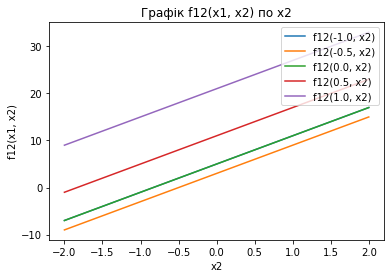

In [ ]:
plt.title("Графік f12(x1, x2) по x2")
plt.xlabel("x2")
plt.ylabel("f12(x1, x2)")

for x_1 in np.arange(x1_min, x1_max+0.0001, 0.5):
  plt.plot(x2, [get_f_with_fixed_x1(x_1, f1)(x_2) for x_2 in x2],label = 'f12('+str(x_1)+', x2)')
plt.legend(loc = 1)
plt.show()

Аналогічно фіксуючи $x_2$ в функції $f_{21}(x_1,x_2)$ та відповідними судженнями отримуємо $f_{21}^* = f_{21}(0,-2) = 28$

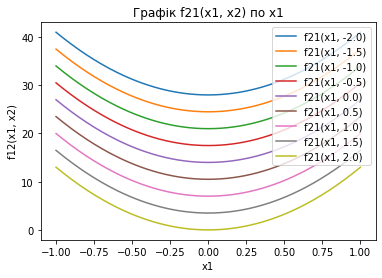

In [ ]:
plt.title("Графік f21(x1, x2) по x1")
plt.xlabel("x1")
plt.ylabel("f12(x1, x2)")

for x_2 in np.arange(x2_min, x2_max+0.0001, 0.5):
  plt.plot(x1, [get_f_with_fixed_x2(x_2, f2)(x_1) for x_1 in x1],label = 'f21(x1, '+str(x_2)+')')
plt.legend(loc = 1)
plt.show()

### Класичний метод: 

$f_{12}(x_1, x_2) = 8x_1^2 + 8x_1+6x_2 + 5$  
$f_{21}(x_1, x_2) = 13x_1^2 -7x_2 + 14$

---

$\frac{\partial f_{12}(x_1, x_2)}{\partial x_2} = 6 \Rightarrow$   
точка мінімуму досягається на граничних точках $x_2$, тобто необхідно перевірити $x2 = -2, x2 = 2$:  
$f_{12}(x_1, -2) = 8x_1^2 + 8x_1 -7$  
$f_{12}(x_1, 2) = 8x_1^2 + 8x_1 +17$  
Бачимо , що фунцкія  досягне  мінімуму в $x_2 = -2$  
З іншої сторони бачимо, що $8x_1^2+8x_1$ - опукла вниз парабола, отже її максимум буде лежати також на граничних значеннях $x_1$.  Нескладно зрозуміти, що при $x_2 = -2$ функція досягає максимуму в точці $x_1 = 1$.  
Отже, $f_{12}^* = max_{x_1}min_{x_2}f_{12}(x_1,x_2) = f_{12}(1, -2) = 9$  

---

Тепер розглянемо $f_{12}(x_1,x_2): $  

$\frac{\partial f_{21}(x_1, x_2)}{\partial x_1} = 26x_1 = 0   \Rightarrow  x_1 = 0$   
Тобто мінімум функції досягається в точці $x_1 = 0$.  
$f_{21}(0, x_2) = -7x_2 + 14$. Це спадна функція, а отже досягає найбільшого значення в лівій границі. Тобто $x_2 = -2$.  
Маємо $f_{21}^* = max_{x_2}min_{x_1}f_{21}(x_1,x_2) = f_{21}(0, -2) = 28$ 

### Висновки

Бачимо, що у всіх 3 методах значення зійшлися, що й очікувалось.

## Знаходження області Парето

In [ ]:
u1 = lambda x1: -(8*x1**2+8*x1-4)/6
u2 = lambda x1: (13/7)*x1**2 -2

Множину парето знаходимо з нерівностей $f_{12}(x_1,x_2)>=f_{12}^*$ та $f_{21}(x_2,x_1)>=f_{21}^*$: 




Для першого суб'єкта з умови $8x_1^2 + 8x_1 + 6x_2 + 5 >=9$  та другого суб'єкта  з умови $13x_1^2 - 7x_2 + 14 >=28$ маємо:

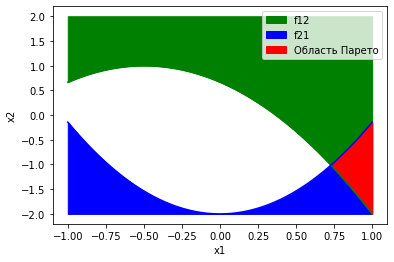

In [ ]:
plt.xlabel("x1")
plt.ylabel("x2")
U1 = np.array([u1(x_1) for x_1 in x1])
U2 = np.array([u2(x_1) for x_1 in x1])
plt.plot(x1, U1, color='green')
plt.plot(x1, U2, color='blue')
plt.fill_between(x1, U1, [x2_max]*x1.size, color = 'green', label = 'f12')
plt.fill_between(x1, U2, [x2_min] * x1.size, color= 'blue', label = 'f21')
plt.fill_between(x1, U1, U2, color= 'red', where=U2>=U1, interpolate=True, label = 'Область Парето')
plt.legend()
plt.show()

## Знаходження мінімального $\Delta $

In [ ]:
delta_table = pd.DataFrame({'x1': x.T[0], 'x2': x.T[1], 
                            '|f12-f12*|': np.array([abs(f1(x1,x2) - f12_gar) for x1,x2 in x]),
                            '|f21-f21*|': np.array([abs(f2(x1,x2)-f21_gar) for x1,x2 in x]) 
                            })
delta_table['max(delta)'] = np.maximum(delta_table['|f12-f12*|'], delta_table['|f21-f21*|'])
delta_table

,x1,x2,|f12-f12*|,|f21-f21*|,max(delta)
0,-1.0,-2.00,16.00,13.00,16.00
1,-1.0,-1.98,15.88,12.86,15.88
2,-1.0,-1.96,15.76,12.72,15.76
3,-1.0,-1.94,15.64,12.58,15.64
4,-1.0,-1.92,15.52,12.44,15.52
...,...,...,...,...,...
40396,1.0,1.92,23.52,14.44,23.52
40397,1.0,1.94,23.64,14.58,23.64
40398,1.0,1.96,23.76,14.72,23.76
40399,1.0,1.98,23.88,14.86,23.88


Знайдемо запис, де значення $max(delta)$ - мінімальне:

In [ ]:
delta_table.loc[delta_table['max(delta)'] == delta_table['max(delta)'].min()]

,x1,x2,|f12-f12*|,|f21-f21*|,max(delta)
34822,0.73,-1.02,0.0168,0.0677,0.0677


Отже, отримали, що $\Delta = min_{x_1, x_2} max_i \Delta_i = 0.0677$  
Оптимальне значення $(x_1^*, x_2^*) = (0.73 ; -1.02 )$  
Зобразимо на вищевказаному графіку точку:


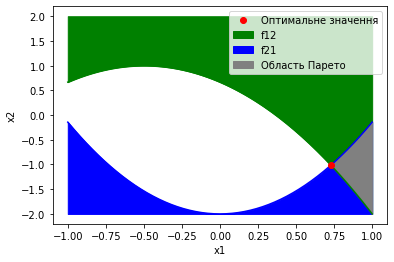

In [ ]:
plt.xlabel("x1")
plt.ylabel("x2")
U1 = np.array([u1(x_1) for x_1 in x1])
U2 = np.array([u2(x_1) for x_1 in x1])
plt.plot(x1, U1, color='green')
plt.plot(x1, U2, color='blue')
plt.fill_between(x1, U1, [x2_max]*x1.size, color = 'green', label = 'f12')
plt.fill_between(x1, U2, [x2_min] * x1.size, color= 'blue', label = 'f21')
plt.fill_between(x1, U1, U2, color= 'gray', where=U2>=U1, interpolate=True, label = 'Область Парето')
plt.plot(0.73, -1.02, 'ro', label = 'Оптимальне значення')
plt.legend()
plt.show()